# Object Detection and Relationship Inference

In [ ]:
import cv2
from google.colab.patches import cv2_imshow
%pip install bardapi
import numpy as np

from bardapi import SESSION_HEADERS
from bardapi import Bard

###Part 1: Object Detection using YOLO

In [ ]:
# Load YOLO model and configuration
net = cv2.dnn.readNet("/content/yolov7-tiny.weights", "/content/yolov7.cfg.txt")

# Load class labels
with open("/content/coco.names.txt", "r") as f:
    classes = [line.strip() for line in f.readlines()]

In [ ]:
# Set input/output file paths
input_file = "assets\testimage_01.jpeg"
output_file = "output1.txt"

# Load input image
image = cv2.imread(input_file)

# Preprocess image
blob = cv2.dnn.blobFromImage(image, 1 / 255.0, (416, 416), swapRB=True, crop=True)

# Set the input blob for the neural network
net.setInput(blob)

In [ ]:
# Initialize dictionary for distinct labels and their confidence
distinct_labels_confidence = {}

In [ ]:
# Get output layer names
layer_names = net.getLayerNames()
output_layers = [layer_names[i - 1] for i in net.getUnconnectedOutLayers()]

# Forward pass
outs = net.forward(output_layers)

In [ ]:
distinct_labels = set()

In [ ]:
# Process each output layer
for out in outs:
    # Process each detection
    for detection in out:
        # Extract class ID and confidence
        scores = detection[5:]
        class_id = np.argmax(scores)
        confidence = scores[class_id]

        # Filter out weak predictions
        if confidence > 0.5:
            # Get class label
            label = classes[class_id]

            # Add label to the set
            distinct_labels.add(label)

            # Scale bounding box coordinates
            width, height = image.shape[1], image.shape[0]
            center_x, center_y, bbox_width, bbox_height = detection[:4] * np.array([width, height, width, height])

            # Calculate top-left corner coordinates
            x = int(center_x - (bbox_width / 2))
            y = int(center_y - (bbox_height / 2))

            # Update the dictionary with label and confidence
            if label in distinct_labels_confidence:
                distinct_labels_confidence[label].append(confidence)
            else:
                distinct_labels_confidence[label] = [confidence]

In [ ]:
# Write detected objects to the file with average confidence
with open(output_file, "w") as f:
    for label, confidences in distinct_labels_confidence.items():
        avg_confidence = sum(confidences) / len(confidences)
        f.write(f"Label: {label}, Average Confidence: {avg_confidence:.2f}\n")

In [ ]:
# Draw bounding boxes on the image for detected objects
for out in outs:
    for detection in out:
        scores = detection[5:]
        class_id = np.argmax(scores)
        confidence = scores[class_id]

        if confidence > 0.5:
            label = classes[class_id]
            bbox = detection[:4] * np.array([width, height, width, height])
            x, y, w, h = (bbox * np.array([1, 1, 1, 1])).astype(int)
            color = (0, 255, 0)  # Green color for the bounding box
            cv2.rectangle(image, (x, y), (x + w, y + h), color, 2)
            text = f"{label}: {confidence:.2f}"
            cv2.putText(image, text, (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, color, 2)

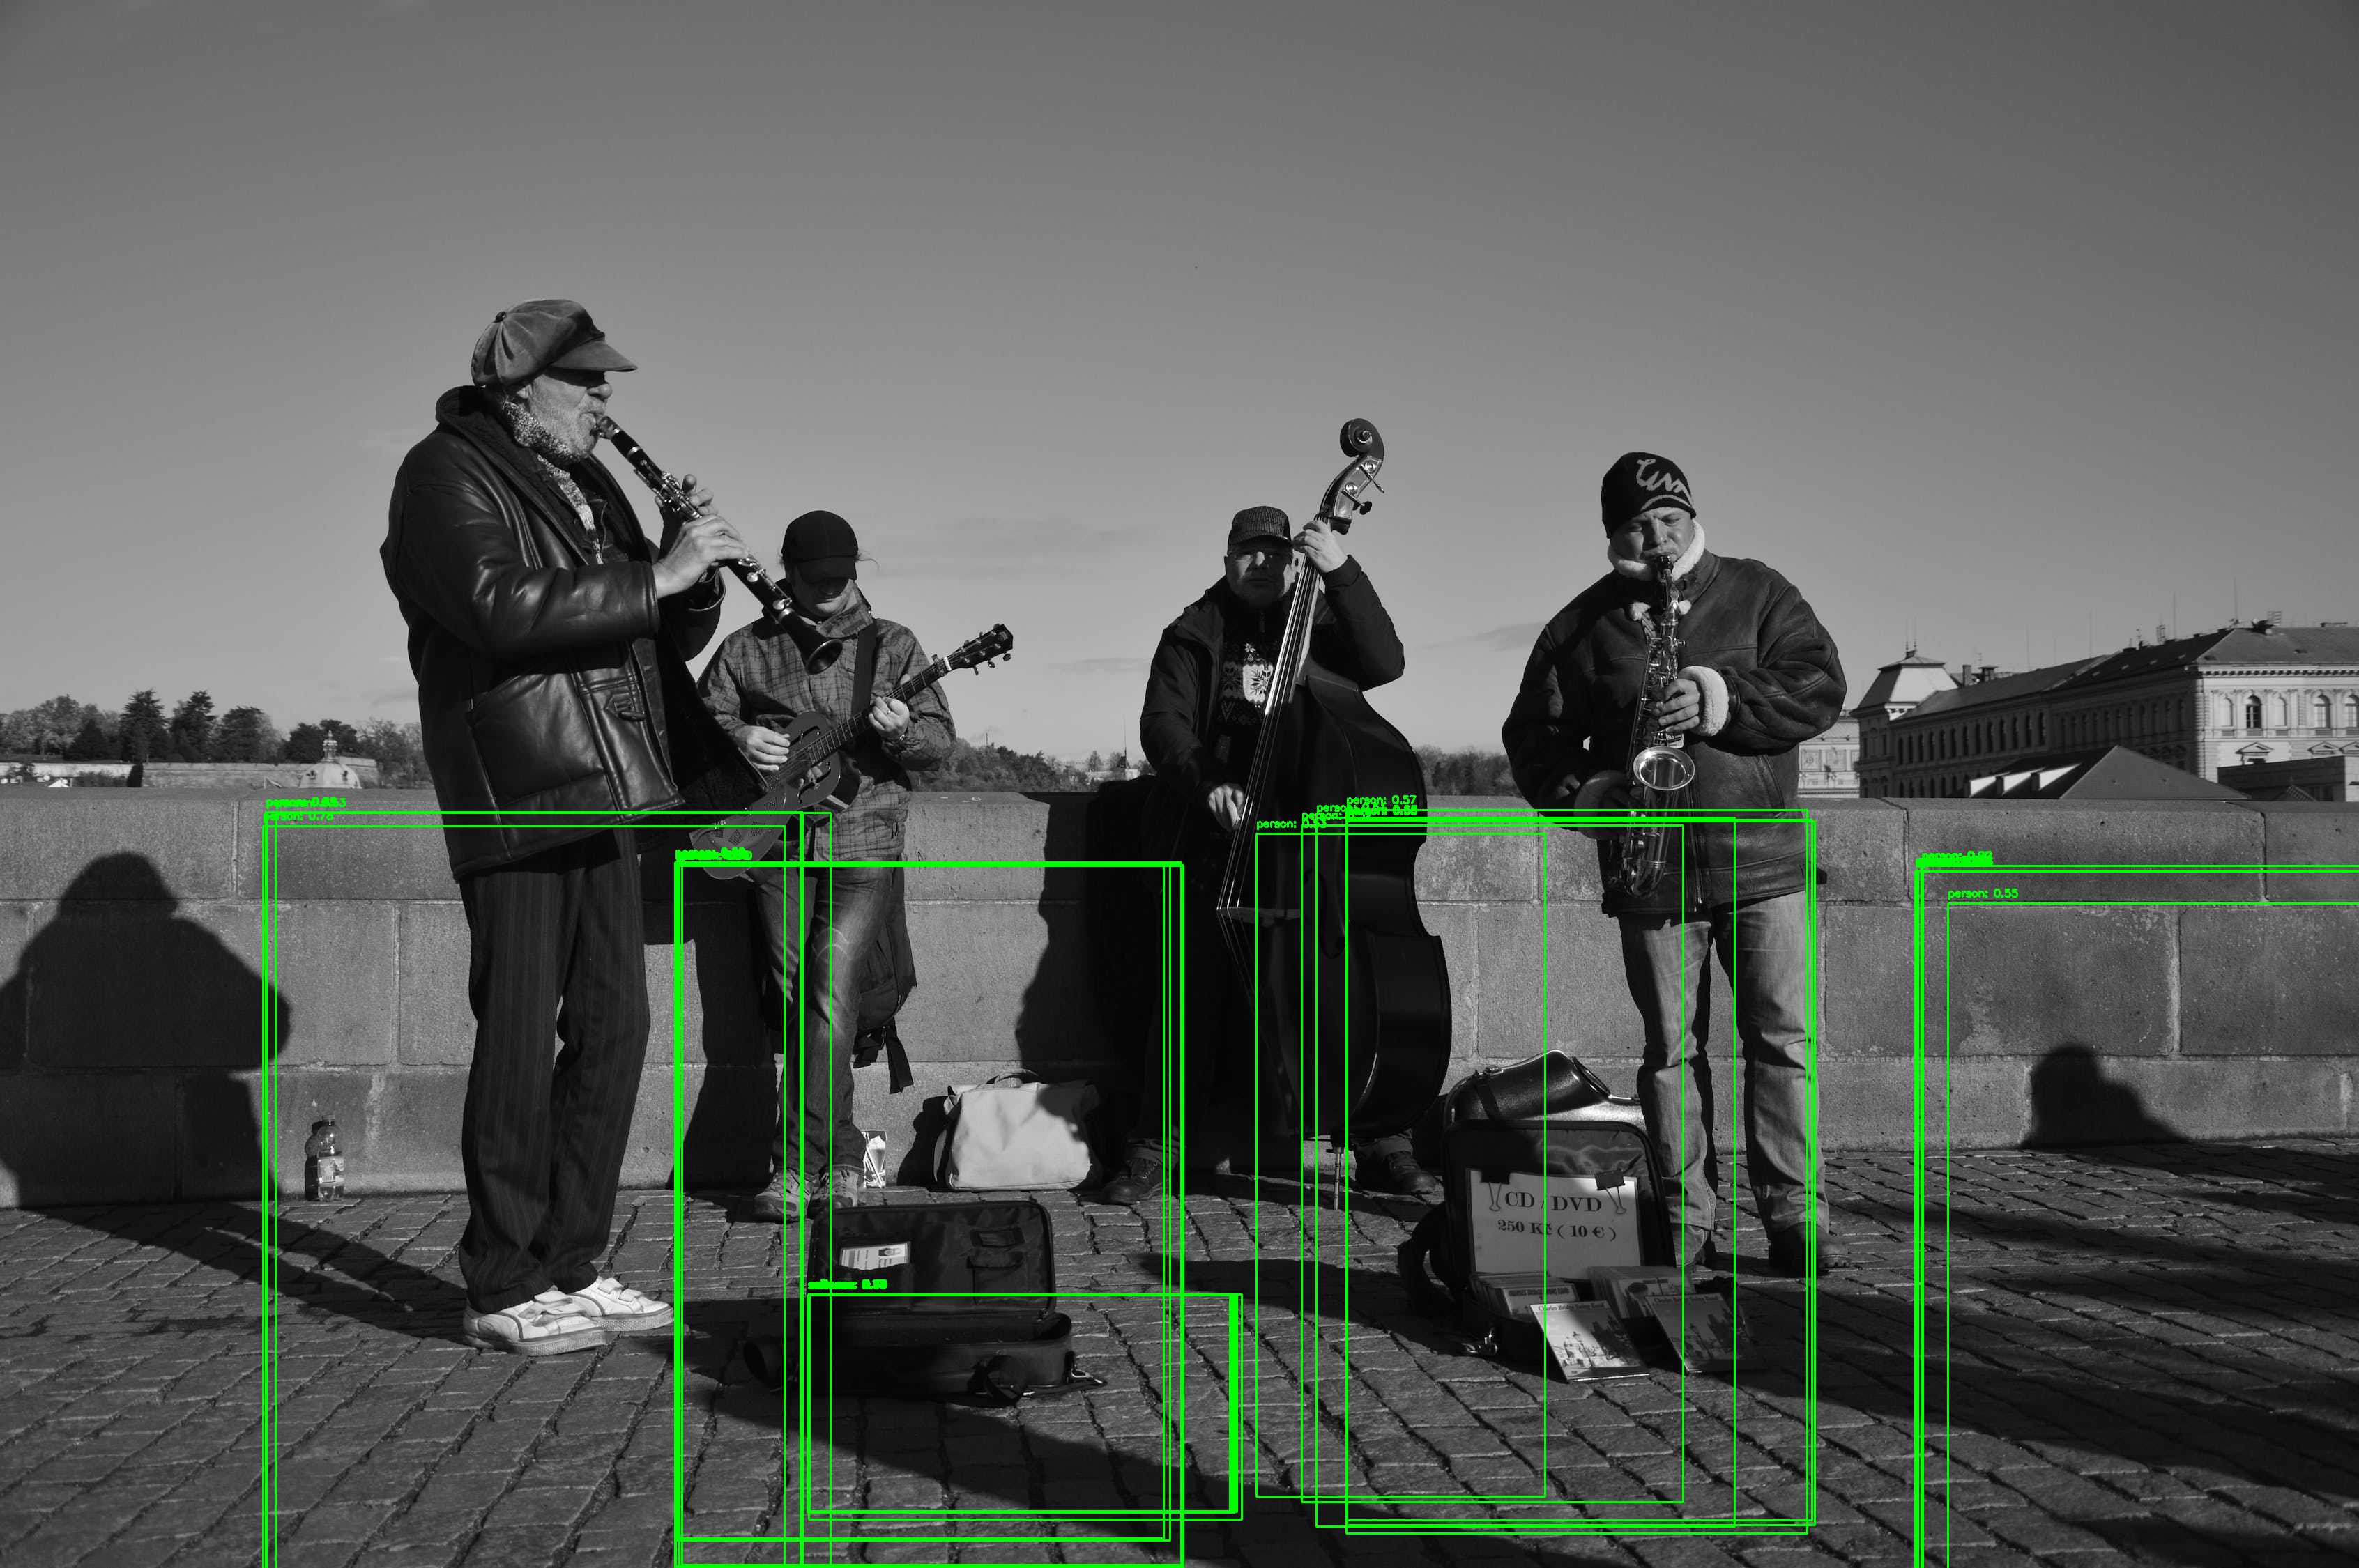

In [ ]:
# Show the image
cv2_imshow(image)
cv2.waitKey(0)
cv2.destroyAllWindows()

### Part 2: Relationship Inference using Bard Api

In [ ]:
# Convert set to a string array
distinct_labels_array = np.array(list(distinct_labels))

In [ ]:
my_file = open("response.txt", 'a+')
topics=[]
str=""
for i in range(len(distinct_labels)-1):
    str=str+distinct_labels_array[i]+","
str="relationship between "+str+ "and "+distinct_labels_array[len(distinct_labels_array)-1]+"(only theory no venn diagram or any diagram)"

for i in range(len(distinct_labels_array)):
    topics.append(distinct_labels_array[i])
topics.append(str);
from bardapi import Bard
import os
os.environ['_BARD_API_KEY']="cwg0wvWtGVlyLq6B3Tby8foC4ZRzgvn2p28qHwD-mxlZ59fjndg02cVDyy0ElJNDMK_94Q."
for i in topics:
    bard_output = Bard().get_answer(i)['content']
    print(i)
    print(bard_output)
    print()

person
A person is a being who has certain capacities or attributes such as reason, morality, consciousness or self-consciousness, and being a part of a culturally established form of social relations such as kinship, ownership of property, or legal responsibility. The defining features of personhood and, consequently, what makes a person count as a person, differ widely among cultures and contexts.

In everyday language, the word "person" is often used to refer to a human being. However, the term "person" can also be used to refer to other entities, such as corporations, artificial intelligence systems, and even animals. For example, we might say that a corporation has "legal personhood" or that an AI system is "a person in the eyes of the law."

The concept of personhood is important in many areas of life, including philosophy, law, and ethics. For example, philosophers debate the criteria for personhood and what it means to be a person. Lawyers use the concept of personhood to deter